In [2]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style, get_style

import matplotlib.pyplot as plt 
import matplotlib as mpl

In [3]:
import torch
torch.manual_seed(0)

In [4]:
name = "benchmark"

In [5]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

In [6]:
task = ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "vae_task", "spatial_sir"]
models = ["gaussian", "multivariate_gaussian", "mixture_gaussian", "maf", "nsf"]

In [7]:
figsize_col=2.
figsize_row_expected_cov = 2.
figsize_row_rob = 1.8

{'verbose': False, 'task': 'gaussian_linear', 'hue': 'model_name', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'defense': 'None', 'alpha': 0.6, 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ReverseKLRobMetric', 'N_train': 1000}
{'verbose': False, 'task': 'lotka_volterra', 'hue': 'model_name', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'defense': 'None', 'alpha': 0.6, 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ReverseKLRobMetric', 'N_train': 1000}
{'verbose': False, 'task': 'vae_task', 'hue': 'model_name', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'defense': 'None', 'alpha': 0.6, 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ReverseKLRobMetric', 'N_train': 1000}
{'verbose': False, 'task': 'hudgkin_huxley', 'hue': 'model_name', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'defense'

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


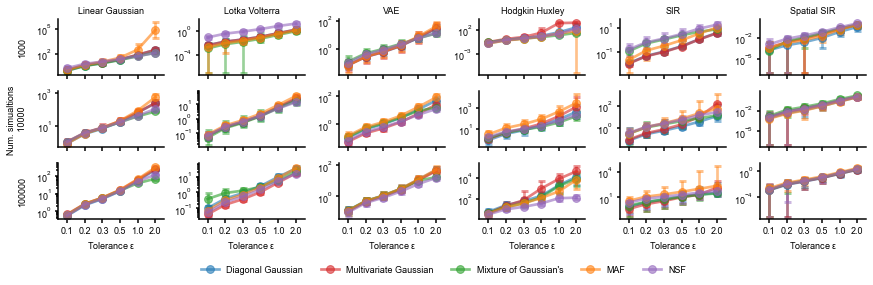

In [8]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "N_train", plot_rob_tolerance_plot, verbose=False, task=task, hue="model_name", model_name=models, defense="None", figsize_per_col=figsize_col, figsize_per_row=1.2,
                            alpha=0.6, legend=False,attack="L2PGDAttack", metric_rob="ReverseKLRobMetric")
    plt.minorticks_off()
    axes[1,0].set_ylabel("Num. simualtions\n 10000")
    plt.show()
    fig.savefig("fig_appendix_complete results_rKL.svg")

{'verbose': False, 'task': 'gaussian_linear', 'hue': 'model_name', 'defense': 'None', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'alpha': 0.6, 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric', 'N_train': 1000}
{'verbose': False, 'task': 'lotka_volterra', 'hue': 'model_name', 'defense': 'None', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'alpha': 0.6, 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric', 'N_train': 1000}
{'verbose': False, 'task': 'vae_task', 'hue': 'model_name', 'defense': 'None', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'alpha': 0.6, 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric', 'N_train': 1000}
{'verbose': False, 'task': 'hudgkin_huxley', 'hue': 'model_name', 'defense': 'None', 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf'

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


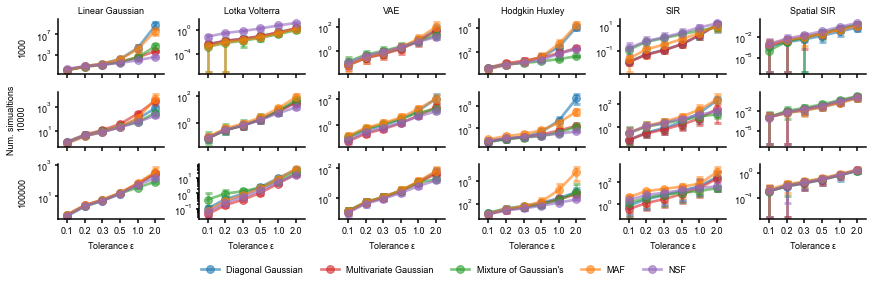

In [9]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "N_train", plot_rob_tolerance_plot, verbose=False, task=task, hue="model_name", defense="None",model_name=models, figsize_per_col=figsize_col, figsize_per_row=1.2,
                            alpha=0.6, legend=False,attack="L2PGDAttack", metric_rob="ForwardKLRobMetric")
    axes[1,0].set_ylabel("Num. simualtions\n 10000")
    plt.minorticks_off()
    plt.show()
    fig.savefig("fig_appendix_complete results_fKL.svg")

In [10]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }

{'defense': 'None', 'task': 'gaussian_linear', 'model_name': 'gaussian', 'with_eps': True, 'hue': 'eps', 'with_grid': False, 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'plot_kwargs': {'color_map': {0.0: '#252525', 0.1: '#feb24c', 0.2: '#fd8d3c', 0.3: '#fc4e2a', 0.5: '#e31a1c', 1.0: '#bd0026', 2.0: '#800026'}}}
{'defense': 'None', 'task': 'lotka_volterra', 'model_name': 'gaussian', 'with_eps': True, 'hue': 'eps', 'with_grid': False, 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAttack', 'plot_kwargs': {'color_map': {0.0: '#252525', 0.1: '#feb24c', 0.2: '#fd8d3c', 0.3: '#fc4e2a', 0.5: '#e31a1c', 1.0: '#bd0026', 2.0: '#800026'}}}
{'defense': 'None', 'task': 'vae_task', 'model_name': 'gaussian', 'with_eps': True, 'hue': 'eps', 'with_grid': False, 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'attack': 'L2PGDAtt

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


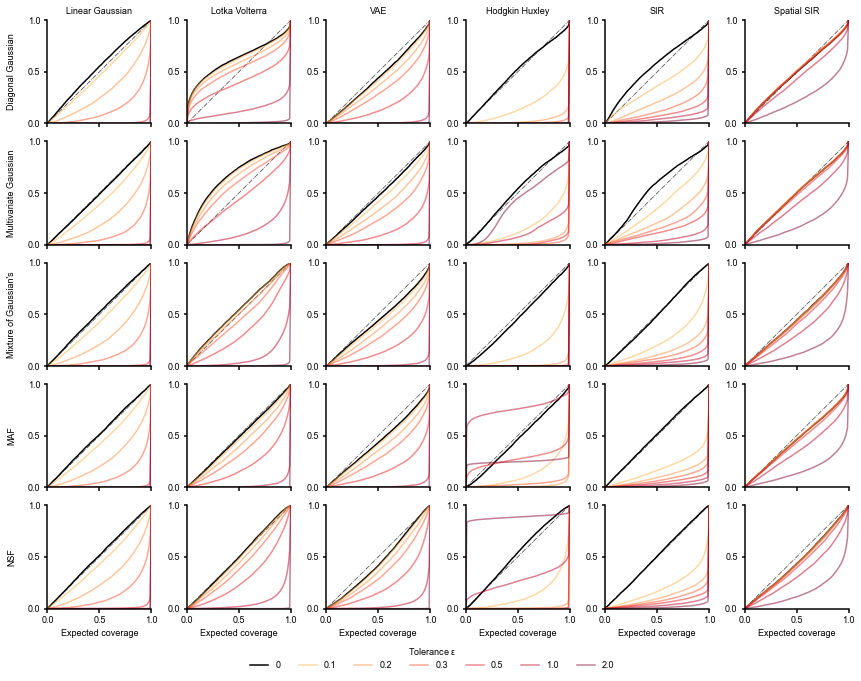

In [18]:
with use_style("pyloric"):
    for n in [100000]:
        fig, axes = multi_plot(name, "task", "model_name", plot_expected_coverage, defense="None", task=task,model_name=models, figsize_per_col=figsize_col, color_map=color_map_eps, 
        figsize_per_row=figsize_col - 0.2, with_eps=True, hue="eps", with_grid=False, N_train=n, verbose=False, loss="NLLLoss", legend_bbox_to_anchor=[0.5,-0.05],  metric_rob="ForwardKLRobMetric", attack="L2PGDAttack", plot_kwargs={"color_map": color_map_eps})
        fig.get_children()[-1].set_title(r"Tolerance $\epsilon$")
        fig.savefig(f"expected_coverages_fKL_n{n}.svg")
        plt.show()


{'defense': 'None', 'model_name': 'gaussian', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'with_grid': False, 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'plot_kwargs': {'color_map': {0.0: '#252525', 0.1: '#feb24c', 0.2: '#fd8d3c', 0.3: '#fc4e2a', 0.5: '#e31a1c', 1.0: '#bd0026', 2.0: '#800026'}}}
{'defense': 'None', 'model_name': 'gaussian', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'with_grid': False, 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAttack', 'plot_kwargs': {'color_map': {0.0: '#252525', 0.1: '#feb24c', 0.2: '#fd8d3c', 0.3: '#fc4e2a', 0.5: '#e31a1c', 1.0: '#bd0026', 2.0: '#800026'}}}
{'defense': 'None', 'model_name': 'gaussian', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'with_grid': False, 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'attack': 'L2PGDAtt

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


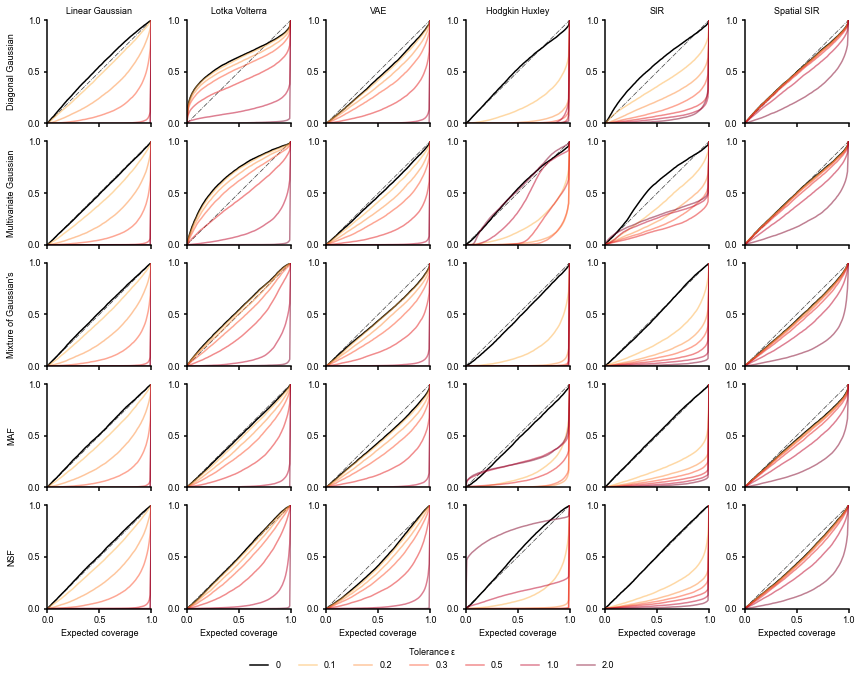

In [17]:
with use_style("pyloric"):
    for n in [100000]:
        fig, axes = multi_plot(name, "task", "model_name", plot_expected_coverage, defense="None",model_name=models, task=task, figsize_per_col=figsize_col, color_map=color_map_eps, 
        figsize_per_row=figsize_col - 0.2, with_eps=True, hue="eps", with_grid=False, N_train=n, verbose=False, loss="NLLLoss", legend_bbox_to_anchor=[0.5,-0.05],  metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", plot_kwargs={"color_map": color_map_eps})
        fig.get_children()[-1].set_title(r"Tolerance $\epsilon$")
        fig.savefig(f"expected_coverages_rKL_n{n}.svg")
        plt.show()
